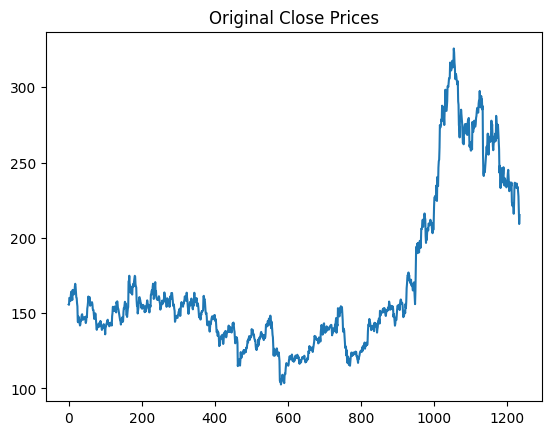

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_15 (SimpleRNN)       │ (None, 100, 50)        │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_16 (SimpleRNN)       │ (None, 100, 50)        │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_17 (SimpleRNN)       │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - loss: 0.1094 - val_loss: 0.0359
Epoch 2/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0025 - val_loss: 0.0401
Epoch 3/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0012 - val_loss: 0.0205
Epoch 4/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - loss: 0.0012 - val_loss: 0.0246
Epoch 5/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - loss: 7.9817e-04 - val_loss: 0.0177
Epoch 6/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 8.4469e-04 - val_loss: 0.0209
Epoch 7/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0012 - val_loss: 0.0239
Epoch 8/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0012 - val_loss: 0.0157
Epoch 9/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 6.9495e-04 - val_loss: 0.0098
Epoch 10/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 6.1004e-04 - val_loss: 0.0065
Epoch 11/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 6.8152e-04 - val_loss: 0.0045
Epoch 12/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 1

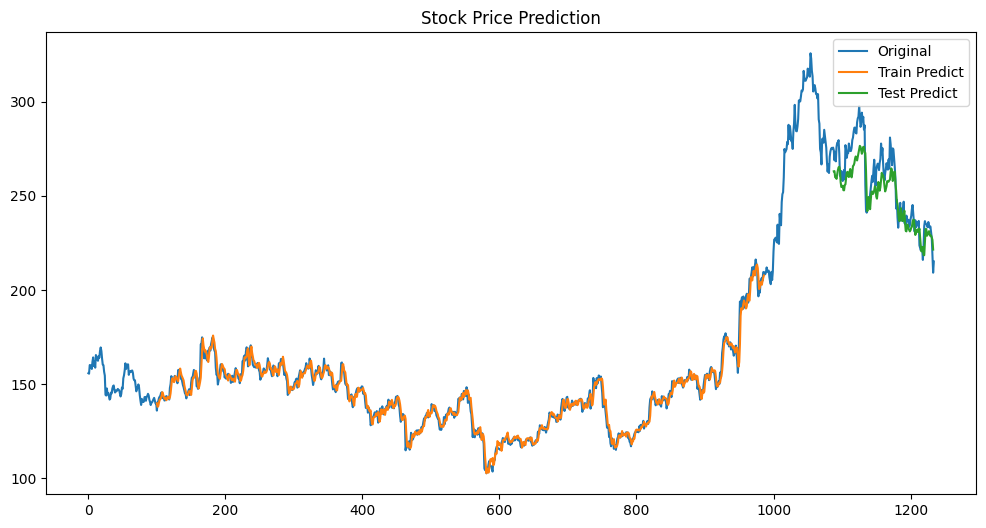

Root Mean Square Error (RMSE): 10.68308960019999
R-squared value: 0.7307


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import math

# Load and reverse the dataset (latest data last)
df = pd.read_csv('NSE-Tata-Global-Beverages-Limited.csv')
df = df[::-1]  # Reverse rows
close_prices = df.reset_index()['Close']

# Visualize the original closing prices
plt.plot(close_prices)
plt.title("Original Close Prices")
plt.show()

# Normalize the close prices between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(np.array(close_prices).reshape(-1, 1))

# Split data: 80% train, 20% test
training_size = int(len(close_prices_scaled) * 0.80)
train_data = close_prices_scaled[0:training_size]
test_data = close_prices_scaled[training_size:]

# Create dataset with time steps
def create_dataset(dataset, time_step=100):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:i+time_step, 0])
        y.append(dataset[i+time_step, 0])
    return np.array(X), np.array(y)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], time_step, 1)
X_test = X_test.reshape(X_test.shape[0], time_step, 1)

# Build RNN model using SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

model = Sequential([
    SimpleRNN(50, return_sequences=True, input_shape=(time_step, 1)),
    SimpleRNN(50, return_sequences=True),
    SimpleRNN(50),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=75, batch_size=70, verbose=1)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
look_back = time_step
train_plot = np.empty_like(close_prices_scaled)
train_plot[:, :] = np.nan
train_plot[look_back:len(train_predict)+look_back] = train_predict

test_plot = np.empty_like(close_prices_scaled)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(look_back*2)+1:len(close_prices_scaled)-1] = test_predict

plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(close_prices_scaled), label='Original')
plt.plot(train_plot, label='Train Predict')
plt.plot(test_plot, label='Test Predict')
plt.legend()
plt.title("Stock Price Prediction")
plt.show()

# Evaluation Metrics
rmse = math.sqrt(mean_squared_error(y_test_original, test_predict))
r2 = r2_score(y_test_original, test_predict)
print(f'Root Mean Square Error (RMSE): {rmse}')
print(f'R-squared value: {r2:.4f}')
